# Injector valves surface roughness analysis
Projekt ma na celu zebranie i analizę danych z raportów zawierających wyniki pomiarów parametrów chropowatości powierzchni zaworów sterujących wysokościśnieniowymi wtryskiwaczami paliwa. Paramtery chropowatości zapisane są w postaci plików PDF.

## 1. Pobranie danych do analizy

### 1.1 Rozpoznanie struktury plików

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import fitz 
import os 

In [2]:
# Funkcja analizująca strukturę pliku PDF
def analyze_pdf_structure(file_path):
    # Otwarcie pliku PDF
    doc = fitz.open(file_path)
    analysis = []

    # Analiza każdej strony w dokumencie
    for page_num, page in enumerate(doc):
        page_info = {
            'Page': page_num + 1,
            'Text': page.get_text("text"),
            'Image_Count': len(page.get_images()),
            'Font_Count': len(page.get_fonts())
        }
        analysis.append(page_info)

    # Zamknięcie dokumentu
    doc.close()

    return analysis

In [3]:
# Scieżka do pliku PDF
file_path = r"51824_1_1.pdf"

# Wywołanie funkcji analizy
analysis = analyze_pdf_structure(file_path)

# Wyświetlenie wyników analizy
for page in analysis:
    print(f"Page {page['Page']}:\nText Length: {len(page['Text'])}\nImages: {page['Image_Count']}\nFonts: {page['Font_Count']}\n")

Page 1:
Text Length: 483
Images: 4
Fonts: 5

Page 2:
Text Length: 1025
Images: 2
Fonts: 5

Page 3:
Text Length: 597
Images: 1
Fonts: 5

Page 4:
Text Length: 1990
Images: 1
Fonts: 5

Page 5:
Text Length: 437
Images: 1
Fonts: 5

Page 6:
Text Length: 989
Images: 3
Fonts: 6

Page 7:
Text Length: 470
Images: 4
Fonts: 5

Page 8:
Text Length: 1026
Images: 2
Fonts: 5

Page 9:
Text Length: 597
Images: 1
Fonts: 5

Page 10:
Text Length: 1996
Images: 1
Fonts: 5

Page 11:
Text Length: 435
Images: 1
Fonts: 5

Page 12:
Text Length: 1000
Images: 3
Fonts: 6

Page 13:
Text Length: 487
Images: 4
Fonts: 5

Page 14:
Text Length: 1022
Images: 2
Fonts: 5

Page 15:
Text Length: 598
Images: 1
Fonts: 5

Page 16:
Text Length: 2054
Images: 1
Fonts: 5

Page 17:
Text Length: 375
Images: 1
Fonts: 5

Page 18:
Text Length: 991
Images: 3
Fonts: 6

Page 19:
Text Length: 470
Images: 4
Fonts: 5

Page 20:
Text Length: 1023
Images: 2
Fonts: 5

Page 21:
Text Length: 595
Images: 1
Fonts: 5

Page 22:
Text Length: 1992
Images: 

In [4]:
# Wyświetlanie zawartości pliku PDF (wyłączone po sprawdzeniu w celu zwiększenia przejrzystości projektu)
#from IPython.display import display, Image

#doc = fitz.open(file_path)

#for page in (doc):
    #pix = page.get_pixmap(matrix=fitz.Matrix(0.3, 0.3))  # Ustawienie skali miniatury
    #img = Image(data=pix.tobytes("png"))
    #display(img)

#doc.close()

### 1.2 Wyodrębnienie z pliku określonych danych

In [5]:
# Funkcja do wyodrębnienia porządanych danych z pliku PDF
def extract_data_from_pdf(file_path):
    # Otwarcie pliku PDF
    doc = fitz.open(file_path)

    # Bardzo specyficzny wzorzec do ekstrakcji danych
    pattern = re.compile(r'(Ra|Rq|Rt|Rz|Rmax|Rp|Rv|Rc|Rsm|Rsk|Rku|Rdq|Rt/Rz|l|Lc|'
                         r'mean Ra|mean Rq|mean Rt|mean Rz|mean Rmax|mean Rp|mean Rv|mean Rc|mean Rsm|mean Rsk|mean Rku|mean Rdq|'
                         r'sigma Ra|sigma Rq|sigma Rt|sigma Rz|sigma Rmax|sigma Rp|sigma Rv|sigma Rc|sigma Rsm|sigma Rsk|sigma Rku|sigma Rdq|'
                         r'Rk|Rpk|Rvk|Rmr1|Rmr2)\s+([-\d.]+)\s*(nm|µm|%|)?')

    data = []

    # Przechodzenie przez bloki po 6 stron dla każdego pomiaru
    for start_page in range(0, len(doc), 6):
        measurement = {}
        # Analiza stron 2-6 w każdym bloku (indeksy 1-5)
        for page_num in range(1, 6):
            page = doc[start_page + page_num]
            text = page.get_text("text").replace('\n', ' ')
            params = pattern.findall(text)
            for name, value, unit in params:
                # Uwzględnienie jednostki, jeśli jest dostępna
                measurement_value = f'{value} {unit}'.strip() if unit else value
                measurement[f'{name}'] = measurement_value
        data.append(measurement)

    # Zamknięcie dokumentu
    doc.close()

    # Konwersja danych do DataFrame
    df = pd.DataFrame(data)
    
    return df


In [6]:
# Ekstrakcja danych z przykładowego pliku
df = extract_data_from_pdf(file_path)
df.head()

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rc,sigma Rsm,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2
0,169 nm,220 nm,1.24 µm,861 nm,1.12 µm,532 nm,706 nm,705 nm,15.1 µm,-0.355,...,47 nm,566 nm,0.147,0.189,0.00788,453 nm,162 nm,314 nm,15 %,84.5 %
1,208 nm,273 nm,1.62 µm,1.15 µm,1.62 µm,741 nm,883 nm,882 nm,16.5 µm,-0.243,...,50.1 nm,1.66 µm,0.0397,0.0497,0.0055,586 nm,265 nm,423 nm,9.39 %,86.2 %
2,185 nm,243 nm,1.27 µm,928 nm,1.26 µm,623 nm,652 nm,671 nm,12.3 µm,-0.0534,...,18 nm,479 nm,0.0254,0.0734,0.00168,495 nm,367 nm,335 nm,10.1 %,85 %
3,252 nm,319 nm,1.63 µm,1.26 µm,1.63 µm,844 nm,791 nm,935 nm,13.1 µm,0.133,...,38.3 nm,404 nm,0.0232,0.219,0.00386,773 nm,324 nm,294 nm,13.4 %,90.1 %
4,176 nm,237 nm,1.56 µm,973 nm,1.53 µm,591 nm,965 nm,736 nm,12.9 µm,-0.216,...,22.4 nm,799 nm,0.0871,0.205,0.00317,473 nm,311 nm,279 nm,13.9 %,86.1 %


In [7]:
# Funkcja pobierania danych z wszystkich plików we wskazanych lokalizacjach
def extract_all_data_from_directories(directories):
    all_data = []

    # Przejście przez każdy katalog w liście
    for directory_path in directories:
        for file in os.listdir(directory_path):
            if file.endswith(".pdf"):
                file_path = os.path.join(directory_path, file)
                data_from_file = extract_data_from_pdf(file_path)

                # Sprawdzenie, czy DataFrame nie jest pusty
                if not data_from_file.empty:
                    # Dodanie indeksu do danych z każdego pliku
                    data_from_file['File_Index'] = [f'{file}_{i+1}' for i in range(len(data_from_file))]
                    all_data.append(data_from_file)

    # Połączenie wszystkich danych w jeden DataFrame
    combined_data = pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()
    
    return combined_data

In [8]:
# Funkcja do pobierania ścieżek dostępu z pliku zewnętrznego
def read_directory_paths(file_path):
    with open(file_path, "r") as f:
        directories = [line.strip() for line in f]
    return directories

paths_file = "paths.txt"

# Wczytanie ścieżek dostępu do plików zewnętrznych
directories = read_directory_paths(paths_file)

# Wywołanie funkcji i wyświetlenie wyników
combined_df = extract_all_data_from_directories(directories)
combined_df

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rsm,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2,File_Index
0,169 nm,220 nm,1.24 µm,861 nm,1.12 µm,532 nm,706 nm,705 nm,15.1 µm,-0.355,...,566 nm,0.147,0.189,0.00788,453 nm,162 nm,314 nm,15 %,84.5 %,51824_1_1.pdf_1
1,208 nm,273 nm,1.62 µm,1.15 µm,1.62 µm,741 nm,883 nm,882 nm,16.5 µm,-0.243,...,1.66 µm,0.0397,0.0497,0.0055,586 nm,265 nm,423 nm,9.39 %,86.2 %,51824_1_1.pdf_2
2,185 nm,243 nm,1.27 µm,928 nm,1.26 µm,623 nm,652 nm,671 nm,12.3 µm,-0.0534,...,479 nm,0.0254,0.0734,0.00168,495 nm,367 nm,335 nm,10.1 %,85 %,51824_1_1.pdf_3
3,252 nm,319 nm,1.63 µm,1.26 µm,1.63 µm,844 nm,791 nm,935 nm,13.1 µm,0.133,...,404 nm,0.0232,0.219,0.00386,773 nm,324 nm,294 nm,13.4 %,90.1 %,51824_1_1.pdf_4
4,176 nm,237 nm,1.56 µm,973 nm,1.53 µm,591 nm,965 nm,736 nm,12.9 µm,-0.216,...,799 nm,0.0871,0.205,0.00317,473 nm,311 nm,279 nm,13.9 %,86.1 %,51824_1_1.pdf_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,237 nm,304 nm,1.74 µm,1.3 µm,1.55 µm,807 nm,933 nm,971 nm,14.1 µm,-0.331,...,592 nm,0.0973,0.0851,0.00507,644 nm,297 nm,372 nm,10.8 %,82.8 %,208250_3_3.pdf_1
176,214 nm,270 nm,1.68 µm,1.09 µm,1.37 µm,963 nm,717 nm,871 nm,13.8 µm,0.462,...,260 nm,0.0151,0.0168,0.00281,626 nm,341 nm,155 nm,14.6 %,90 %,208250_3_3.pdf_2
177,161 nm,216 nm,1.32 µm,944 nm,1.32 µm,485 nm,837 nm,750 nm,17.5 µm,-0.927,...,969 nm,0.055,0.24,0.00233,444 nm,184 nm,393 nm,7.99 %,86.1 %,208250_3_3.pdf_3
178,169 nm,218 nm,1.37 µm,869 nm,1.17 µm,762 nm,604 nm,659 nm,17.2 µm,0.328,...,1.89 µm,0.171,0.5,0.00993,515 nm,347 nm,174 nm,10.4 %,89.8 %,208250_3_3.pdf_4


## 2. Oczyszczanie i przygotowanie danych

### 2.1 Ujednolicenie jednostek i usunięcie opisu jednostki z komórek z danymi

In [9]:
all_data = combined_df.copy()

In [10]:
# Funkcja do ujednolicenia jednostek
def convert_to_number(cell):
    if isinstance(cell, str):
        try:
            # Sprawdzanie i konwersja jednostek
            if 'nm' in cell:
                return float(cell.replace('nm', '')) / 1000
            elif 'µm' in cell:
                return float(cell.replace('µm', ''))
            elif '%' in cell:
                return float(cell.replace('%', ''))
            else:
                return float(cell)  # Próba bezpośredniej konwersji
        except ValueError:
            return cell  # Zwracanie oryginalnej wartości, jeśli konwersja nie jest możliwa
    return cell

In [11]:
all_data.columns

Index(['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rc', 'Rsm', 'Rsk', 'Rku',
       'Rdq', 'Rt/Rz', 'l', 'Lc', 'mean Ra', 'mean Rq', 'mean Rt', 'mean Rz',
       'mean Rmax', 'mean Rp', 'mean Rv', 'mean Rc', 'mean Rsm', 'mean Rsk',
       'mean Rku', 'mean Rdq', 'sigma Ra', 'sigma Rq', 'sigma Rt', 'sigma Rz',
       'sigma Rmax', 'sigma Rp', 'sigma Rv', 'sigma Rc', 'sigma Rsm',
       'sigma Rsk', 'sigma Rku', 'sigma Rdq', 'Rk', 'Rpk', 'Rvk', 'Rmr1',
       'Rmr2', 'File_Index'],
      dtype='object')

In [12]:
# Wykluczenie kolumny 'File_Index' z czyszczenia
exclude_columns = ['File_Index'] 

# Pętla do zamiany danych na liczby
for col in all_data.columns:
    if col not in exclude_columns:
        all_data[col] = all_data[col].apply(convert_to_number)

all_data

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rsm,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2,File_Index
0,0.169,0.220,1.24,0.861,1.12,0.532,0.706,0.705,15.1,-0.3550,...,0.566,0.1470,0.1890,0.00788,0.453,0.162,0.314,15.00,84.5,51824_1_1.pdf_1
1,0.208,0.273,1.62,1.150,1.62,0.741,0.883,0.882,16.5,-0.2430,...,1.660,0.0397,0.0497,0.00550,0.586,0.265,0.423,9.39,86.2,51824_1_1.pdf_2
2,0.185,0.243,1.27,0.928,1.26,0.623,0.652,0.671,12.3,-0.0534,...,0.479,0.0254,0.0734,0.00168,0.495,0.367,0.335,10.10,85.0,51824_1_1.pdf_3
3,0.252,0.319,1.63,1.260,1.63,0.844,0.791,0.935,13.1,0.1330,...,0.404,0.0232,0.2190,0.00386,0.773,0.324,0.294,13.40,90.1,51824_1_1.pdf_4
4,0.176,0.237,1.56,0.973,1.53,0.591,0.965,0.736,12.9,-0.2160,...,0.799,0.0871,0.2050,0.00317,0.473,0.311,0.279,13.90,86.1,51824_1_1.pdf_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.237,0.304,1.74,1.300,1.55,0.807,0.933,0.971,14.1,-0.3310,...,0.592,0.0973,0.0851,0.00507,0.644,0.297,0.372,10.80,82.8,208250_3_3.pdf_1
176,0.214,0.270,1.68,1.090,1.37,0.963,0.717,0.871,13.8,0.4620,...,0.260,0.0151,0.0168,0.00281,0.626,0.341,0.155,14.60,90.0,208250_3_3.pdf_2
177,0.161,0.216,1.32,0.944,1.32,0.485,0.837,0.750,17.5,-0.9270,...,0.969,0.0550,0.2400,0.00233,0.444,0.184,0.393,7.99,86.1,208250_3_3.pdf_3
178,0.169,0.218,1.37,0.869,1.17,0.762,0.604,0.659,17.2,0.3280,...,1.890,0.1710,0.5000,0.00993,0.515,0.347,0.174,10.40,89.8,208250_3_3.pdf_4


### 2.2 Utworzenie tabeli danych pogrupowanych pod względem nr próbki i odcinka pomiarowego

In [13]:
# Utworzenie nowej kolumny z nr próki
sample_data = all_data.copy()
sample_data['Sample_Section'] = sample_data['File_Index'].apply(lambda x: '_'.join([x.split('_')[0], x.split('_')[2].split('.')[0]]))

In [14]:
sample_data[['File_Index', 'Sample_Section']].head(10)

,File_Index,Sample_Section
0,51824_1_1.pdf_1,51824_1
1,51824_1_1.pdf_2,51824_1
2,51824_1_1.pdf_3,51824_1
3,51824_1_1.pdf_4,51824_1
4,51824_1_1.pdf_5,51824_1
5,51824_1_2.pdf_1,51824_2
6,51824_1_2.pdf_2,51824_2
7,51824_1_2.pdf_3,51824_2
8,51824_1_2.pdf_4,51824_2
9,51824_1_2.pdf_5,51824_2


In [15]:
sample_data.isnull().sum()

Ra                1
Rq                1
Rt                1
Rz                1
Rmax              1
Rp                1
Rv                1
Rc                1
Rsm               0
Rsk               0
Rku               0
Rdq               0
Rt/Rz             0
l                 0
Lc                0
mean Ra           0
mean Rq           0
mean Rt           0
mean Rz           0
mean Rmax         0
mean Rp           0
mean Rv           0
mean Rc           0
mean Rsm          0
mean Rsk          0
mean Rku          0
mean Rdq          0
sigma Ra          0
sigma Rq          0
sigma Rt          0
sigma Rz          0
sigma Rmax        0
sigma Rp          0
sigma Rv          0
sigma Rc          0
sigma Rsm         0
sigma Rsk         0
sigma Rku         0
sigma Rdq         0
Rk                0
Rpk               0
Rvk               0
Rmr1              0
Rmr2              0
File_Index        0
Sample_Section    0
dtype: int64

In [16]:
nan_raws = sample_data[sample_data.isna().any(axis=1)]
nan_raws

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2,File_Index,Sample_Section
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,0.309,...,0.0,0.0,0.0,0.664,0.37,0.184,8.65,92.0,79028_1_3.pdf_1,79028_3


In [17]:
sample_data = sample_data.dropna()
sample_data[sample_data.isna().any(axis=1)]

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2,File_Index,Sample_Section


## 3. Analiza statystyczna danych
Zebrane z raportów dane nt. wartości parametrów chropowatości badanych zaworów zostaną poddane analizom statystycznym w celu odnalezienia ewentualnych różnic pomiędzy zaworami.

In [18]:
# Lista parametrów do analizy
parameters = ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rsk', 'Rku', 'Rk', 'Rpk', 'Rvk']

### 3.1 Obliczanie statystyk opisowych dla wybranych paramterów chropowatości

In [19]:
for param in parameters:
    print(f"Statystyki dla {param}:")
    print(sample_data.groupby('Sample_Section')[param].agg(['mean', 'std']).round(2))         

Statystyki dla Ra:
                mean   std
Sample_Section            
208250_1        0.16  0.04
208250_2        0.17  0.03
208250_3        0.17  0.03
51824_1         0.18  0.04
51824_2         0.25  0.05
51824_3         0.22  0.07
79028_1         0.28  0.03
79028_2         0.25  0.03
79028_3         0.20  0.03
88911_1         0.19  0.04
88911_2         0.22  0.04
88911_3         0.21  0.04
Statystyki dla Rq:
                mean   std
Sample_Section            
208250_1        0.21  0.05
208250_2        0.22  0.04
208250_3        0.23  0.03
51824_1         0.23  0.05
51824_2         0.31  0.06
51824_3         0.28  0.08
79028_1         0.35  0.03
79028_2         0.32  0.04
79028_3         0.25  0.03
88911_1         0.25  0.06
88911_2         0.29  0.05
88911_3         0.27  0.05
Statystyki dla Rt:
                mean   std
Sample_Section            
208250_1        1.14  0.32
208250_2        1.32  0.31
208250_3        1.44  0.26
51824_1         1.41  0.35
51824_2         1.70  0.3

### 3.2 Test ANOVA i testy post hoc dla wybranych parametrów

In [20]:
import scipy.stats as stats

# Przeprowadzenie testu dla parametru Ra
anova_result = stats.f_oneway(*[group["Ra"].values for name, group in sample_data.groupby("Sample_Section")])
print(f"Wynik ANOVA dla Ra: {anova_result}")

Wynik ANOVA dla Ra: F_onewayResult(statistic=12.957195787860629, pvalue=1.3398437233965319e-17)


In [21]:
import statsmodels.stats.multicomp as mc 

# Przygotowanie danych do przeprowadzenia testu Tukeya
comp = mc.MultiComparison(sample_data['Ra'], sample_data['Sample_Section'])

In [22]:
tukey_results_Ra = comp.tukeyhsd()
print(tukey_results_Ra)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
208250_1 208250_2   0.0037    1.0 -0.0441  0.0516  False
208250_1 208250_3   0.0109 0.9998  -0.037  0.0587  False
208250_1  51824_1   0.0135 0.9987 -0.0344  0.0613  False
208250_1  51824_2   0.0839    0.0  0.0361  0.1318   True
208250_1  51824_3    0.059 0.0038  0.0112  0.1068   True
208250_1  79028_1   0.1145    0.0  0.0667  0.1624   True
208250_1  79028_2   0.0871    0.0  0.0393   0.135   True
208250_1  79028_3   0.0374 0.3171 -0.0112  0.0861  False
208250_1  88911_1   0.0269 0.7776 -0.0209  0.0748  False
208250_1  88911_2   0.0601 0.0028  0.0122  0.1079   True
208250_1  88911_3   0.0493 0.0366  0.0015  0.0972   True
208250_2 208250_3   0.0071    1.0 -0.0407   0.055  False
208250_2  51824_1   0.0097 0.9999 -0.0381  0.0576  False
208250_2  51824_2   0.0802    0.0  0.0324   0.128   True
208250_2  51824_3   0.0553 0.00

In [23]:
# Konwersja wyników testu Tukeya HSD na DataFrame
tukey_df = pd.DataFrame(data=tukey_results_Ra._results_table.data[1:], columns=tukey_results_Ra._results_table.data[0])

# Filtrowanie par z istotną różnicą statystyczną
istotne_pary_df = tukey_df[tukey_df['reject'] == True]

print(istotne_pary_df[['group1', 'group2']])


      group1   group2
3   208250_1  51824_2
4   208250_1  51824_3
5   208250_1  79028_1
6   208250_1  79028_2
9   208250_1  88911_2
10  208250_1  88911_3
13  208250_2  51824_2
14  208250_2  51824_3
15  208250_2  79028_1
16  208250_2  79028_2
19  208250_2  88911_2
22  208250_3  51824_2
23  208250_3  51824_3
24  208250_3  79028_1
25  208250_3  79028_2
28  208250_3  88911_2
30   51824_1  51824_2
32   51824_1  79028_1
33   51824_1  79028_2
42   51824_2  88911_1
45   51824_3  79028_1
52   79028_1  79028_3
53   79028_1  88911_1
54   79028_1  88911_2
55   79028_1  88911_3
56   79028_2  79028_3
57   79028_2  88911_1


### 3.3 Przeprowadzenie analizy statysytcznej ANOVA i testu Tukeya dla pozostałych paramterów

In [24]:
# Funkcja do przeprowadzenia testu ANOVA, a gdy pozytywny przeprowadzi test Tukeya i wyobrębni pary o istotnych różnicach
def ANOVA_Tukey(parametr):
    # Przeprowadzenie testu ANOVA dla jednego parametru
    anova_result = stats.f_oneway(*[group[parametr].values for name, group in sample_data.groupby('Sample_Section')])
    print(f"Wynik ANOVA dla {parametr}: {anova_result}")

    if anova_result.pvalue < 0.05:
        comp = mc.MultiComparison(sample_data[parametr], sample_data['Sample_Section'])
        tukey_result = comp.tukeyhsd()
        istotne_pary_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
        istotne_pary_df = istotne_pary_df[istotne_pary_df['reject'] == True]
        print(f'Istotne pary dla {parametr}:\n', istotne_pary_df[['group1', 'group2']])
        return istotne_pary_df
    else:
        print(f'Brak istotnych różnic dla {parametr}')
        return None

In [25]:
wyniki_pary = {}
for parametr in parameters:
    wyniki_pary[parametr] = ANOVA_Tukey(parametr)

Wynik ANOVA dla Ra: F_onewayResult(statistic=12.957195787860629, pvalue=1.3398437233965319e-17)
Istotne pary dla Ra:
       group1   group2
3   208250_1  51824_2
4   208250_1  51824_3
5   208250_1  79028_1
6   208250_1  79028_2
9   208250_1  88911_2
10  208250_1  88911_3
13  208250_2  51824_2
14  208250_2  51824_3
15  208250_2  79028_1
16  208250_2  79028_2
19  208250_2  88911_2
22  208250_3  51824_2
23  208250_3  51824_3
24  208250_3  79028_1
25  208250_3  79028_2
28  208250_3  88911_2
30   51824_1  51824_2
32   51824_1  79028_1
33   51824_1  79028_2
42   51824_2  88911_1
45   51824_3  79028_1
52   79028_1  79028_3
53   79028_1  88911_1
54   79028_1  88911_2
55   79028_1  88911_3
56   79028_2  79028_3
57   79028_2  88911_1
Wynik ANOVA dla Rq: F_onewayResult(statistic=11.435781614639572, pvalue=1.0256578983334871e-15)
Istotne pary dla Rq:
       group1   group2
3   208250_1  51824_2
4   208250_1  51824_3
5   208250_1  79028_1
6   208250_1  79028_2
9   208250_1  88911_2
13  208250_2  51

### 3.4 Przeprowadzenie analizy krzyżowej dla wyodrębnionych par o istotnych różnicach 

In [26]:
wszystkie_istotne_pary = {}

for parametr, df in wyniki_pary.items():
    if df is not None:
        for index, row in df.iterrows():
            para = (row['group1'], row['group2'])
            wszystkie_istotne_pary.setdefault(para, []).append(parametr)

# Analiza skrzyżowana - wyszukiwanie par występujących w wielu parametrach
czesto_wystepujace_pary = {para: parametry for para, parametry in wszystkie_istotne_pary.items() if len(parametry) > 1}

for para, parametry in czesto_wystepujace_pary.items():
    print(f"Pary {para} są istotne dla parametrów: {parametry}")

Pary ('208250_1', '51824_2') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rv', 'Rk']
Pary ('208250_1', '51824_3') są istotne dla parametrów: ['Ra', 'Rq', 'Rz', 'Rk']
Pary ('208250_1', '79028_1') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rk', 'Rpk']
Pary ('208250_1', '79028_2') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rk']
Pary ('208250_1', '88911_2') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rpk']
Pary ('208250_1', '88911_3') są istotne dla parametrów: ['Ra', 'Rt', 'Rz', 'Rk']
Pary ('208250_2', '51824_2') są istotne dla parametrów: ['Ra', 'Rq', 'Rz', 'Rv', 'Rk']
Pary ('208250_2', '51824_3') są istotne dla parametrów: ['Ra', 'Rq']
Pary ('208250_2', '79028_1') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rk', 'Rpk']
Pary ('208250_2', '79028_2') są istotne dla parametrów: ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rv', 'Rk']
Pary ('208250_2', '88911_2') są istot

In [27]:
# Filtrujemy pary, eliminując te wewnątrz tej samej próbki
filtr_pary = [para for para in czesto_wystepujace_pary if para[0].split('_')[0] != para[1].split('_')[0]]

# Filtrujemy dalej, aby zachować tylko te pary, które mają taki sam odcinek pomiarowy
filtr_pary = [para for para in filtr_pary if para[0].split('_')[1] == para[1].split('_')[1]]

istotne_parametry_dla_wybranych_par = {para: czesto_wystepujace_pary[para] for para in filtr_pary if para in czesto_wystepujace_pary}

# Wyświetlamy istotne parametry dla wybranych par
for para, parametry in istotne_parametry_dla_wybranych_par.items():
    print(f"{para}: {parametry}")

('208250_1', '79028_1'): ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rv', 'Rk', 'Rpk']
('208250_2', '51824_2'): ['Ra', 'Rq', 'Rz', 'Rv', 'Rk']
('208250_2', '79028_2'): ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rv', 'Rk']
('208250_2', '88911_2'): ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rv']
('51824_1', '79028_1'): ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rk', 'Rpk']
('79028_1', '88911_1'): ['Ra', 'Rq', 'Rt', 'Rz', 'Rmax', 'Rp', 'Rk', 'Rpk']


### 3.5 Wizualizacja wyników analizy krzyżowej

In [28]:
from sklearn.cluster import KMeans
import seaborn as sns

# Ustawienie zmiennej środowiskowej, aby uniknąć przecieku pamięci na Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Wybór próbki na podstawie wyników analizy krzyżowej
wybrane_probki = ['208250_1', '51824_2', '79028_1', '88911_2']

# Filtracja danych do klastrowania dla wybranych próbek i parametrów
data_for_clustering = sample_data[sample_data['Sample_Section'].isin(wybrane_probki)][['Sample_Section', 'Ra', 'Rz']]
data_for_clustering_pivot = data_for_clustering.pivot(columns='Sample_Section', values=['Ra', 'Rz']).fillna(0)


In [29]:
# Liczba klastrów
n_clusters = 4

# Trenowanie modelu KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_for_clustering_pivot)

# Dodanie informacji o przynależności do klastra do danych
data_for_clustering_pivot['Cluster'] = clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


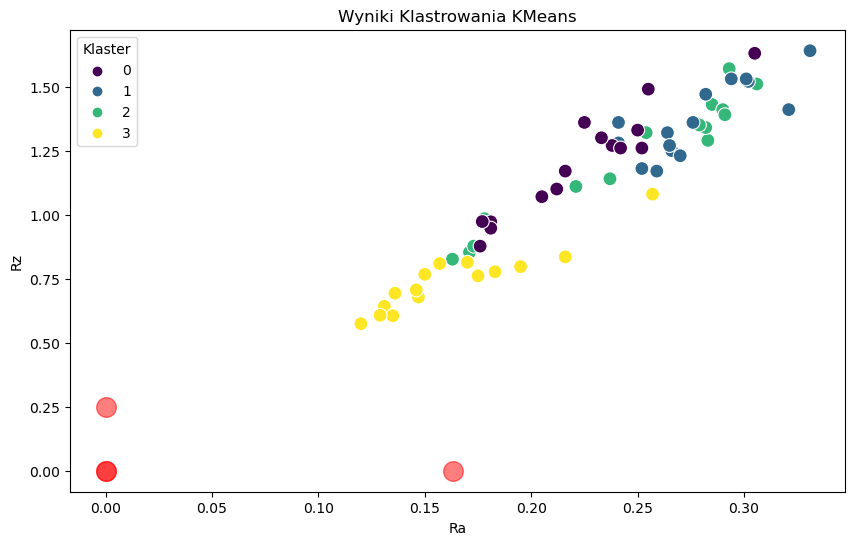

In [33]:
# Przygotowanie danych do wizualizacji
# Może być konieczne dostosowanie tego w zależności od struktury data_for_clustering
plot_data = data_for_clustering.copy()
plot_data['Cluster'] = clusters

plt.figure(figsize=(10, 6))

# Wizualizacja klastrów
sns.scatterplot(x='Ra', y='Rz', data=plot_data, hue='Cluster', palette='viridis', s=100)

# Wizualizacja centrów klastrów
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.title('Wyniki Klastrowania KMeans')
plt.xlabel('Ra')
plt.ylabel('Rz')
plt.legend(title='Klaster')
plt.show()

In [35]:
from sklearn.decomposition import PCA 

# Dodanie dodatkowych parametrów do analizy
data_for_clustering = sample_data[sample_data['Sample_Section'].isin(wybrane_probki)][['Sample_Section', 'Ra', 'Rz', 'Rt', 'Rq', 'Rmax']]
data_for_clustering_pivot = data_for_clustering.pivot(columns='Sample_Section').fillna(0)

# Liczba klastrów
n_clusters = 4

In [36]:
# Trenowanie modelu KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_for_clustering_pivot)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
# Redukcja wymiarowości do 2D dla wizualizacji
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_clustering_pivot)
data_for_clustering['PCA1'] = pca_result[:, 0]
data_for_clustering['PCA2'] = pca_result[:, 1]
data_for_clustering['Cluster'] = clusters


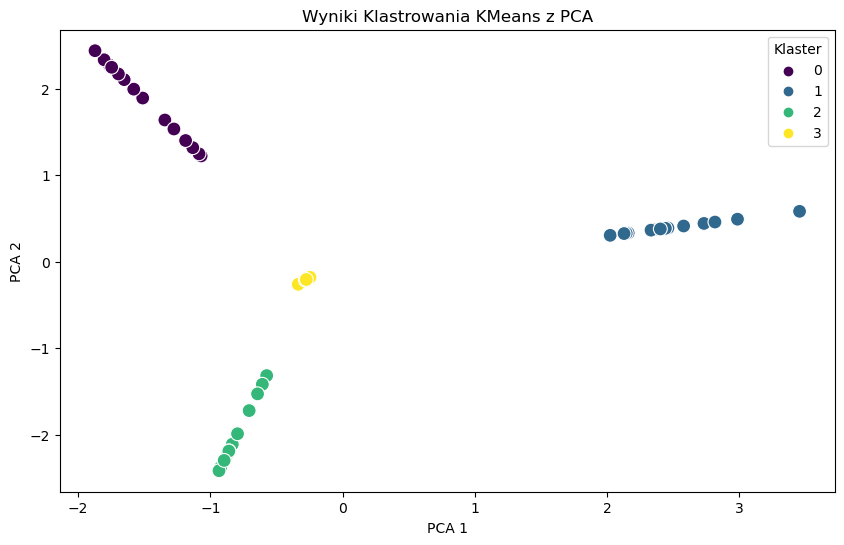

In [38]:
# Tworzenie wykresu PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=data_for_clustering, hue='Cluster', palette='viridis', s=100)
plt.title('Wyniki Klastrowania KMeans z PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Klaster')
plt.show()

In [39]:
wybrane_probki

['208250_1', '51824_2', '79028_1', '88911_2']

In [40]:
sample_data

,Ra,Rq,Rt,Rz,Rmax,Rp,Rv,Rc,Rsm,Rsk,...,sigma Rsk,sigma Rku,sigma Rdq,Rk,Rpk,Rvk,Rmr1,Rmr2,File_Index,Sample_Section
0,0.169,0.220,1.24,0.861,1.12,0.532,0.706,0.705,15.1,-0.3550,...,0.1470,0.1890,0.00788,0.453,0.162,0.314,15.00,84.5,51824_1_1.pdf_1,51824_1
1,0.208,0.273,1.62,1.150,1.62,0.741,0.883,0.882,16.5,-0.2430,...,0.0397,0.0497,0.00550,0.586,0.265,0.423,9.39,86.2,51824_1_1.pdf_2,51824_1
2,0.185,0.243,1.27,0.928,1.26,0.623,0.652,0.671,12.3,-0.0534,...,0.0254,0.0734,0.00168,0.495,0.367,0.335,10.10,85.0,51824_1_1.pdf_3,51824_1
3,0.252,0.319,1.63,1.260,1.63,0.844,0.791,0.935,13.1,0.1330,...,0.0232,0.2190,0.00386,0.773,0.324,0.294,13.40,90.1,51824_1_1.pdf_4,51824_1
4,0.176,0.237,1.56,0.973,1.53,0.591,0.965,0.736,12.9,-0.2160,...,0.0871,0.2050,0.00317,0.473,0.311,0.279,13.90,86.1,51824_1_1.pdf_5,51824_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.237,0.304,1.74,1.300,1.55,0.807,0.933,0.971,14.1,-0.3310,...,0.0973,0.0851,0.00507,0.644,0.297,0.372,10.80,82.8,208250_3_3.pdf_1,208250_3
176,0.214,0.270,1.68,1.090,1.37,0.963,0.717,0.871,13.8,0.4620,...,0.0151,0.0168,0.00281,0.626,0.341,0.155,14.60,90.0,208250_3_3.pdf_2,208250_3
177,0.161,0.216,1.32,0.944,1.32,0.485,0.837,0.750,17.5,-0.9270,...,0.0550,0.2400,0.00233,0.444,0.184,0.393,7.99,86.1,208250_3_3.pdf_3,208250_3
178,0.169,0.218,1.37,0.869,1.17,0.762,0.604,0.659,17.2,0.3280,...,0.1710,0.5000,0.00993,0.515,0.347,0.174,10.40,89.8,208250_3_3.pdf_4,208250_3


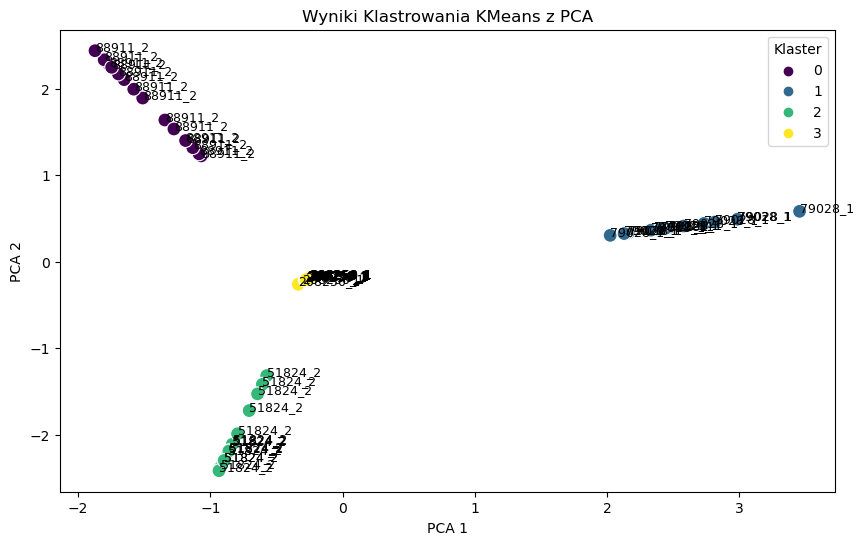

In [42]:
plt.figure(figsize=(10, 6))

# Dodanie punktów do wykresu
for idx in data_for_clustering.index:
    plt.text(data_for_clustering.loc[idx, 'PCA1'], 
             data_for_clustering.loc[idx, 'PCA2'], 
             data_for_clustering.loc[idx, 'Sample_Section'], 
             fontsize=9)

# Rysowanie punktów z klastrowaniem
sns.scatterplot(x='PCA1', y='PCA2', data=data_for_clustering, hue='Cluster', palette='viridis', s=100)

plt.title('Wyniki Klastrowania KMeans z PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Klaster')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


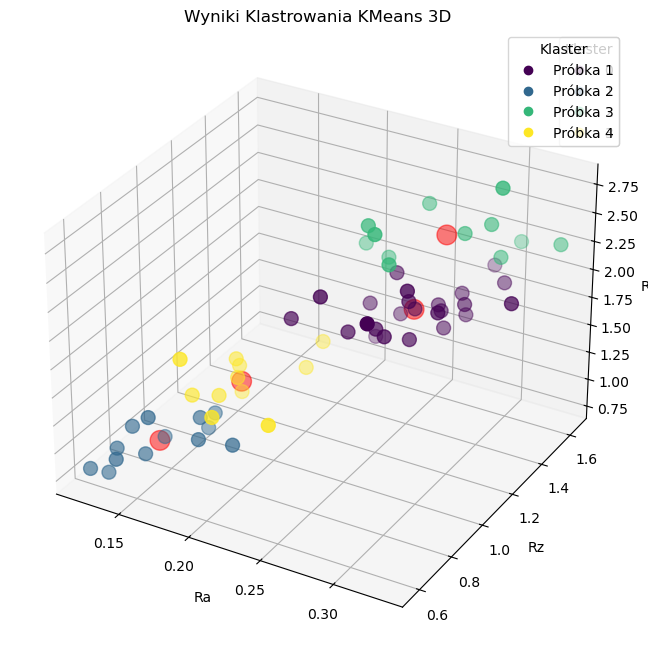

In [43]:
from mpl_toolkits.mplot3d import Axes3D
# Filtracja danych do klastrowania dla wybranych próbek i parametrów
data_for_clustering = sample_data[sample_data['Sample_Section'].isin(wybrane_probki)][['Sample_Section', 'Ra', 'Rz', 'Rt']]

# Liczba klastrów
n_clusters = 4

# Trenowanie modelu KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_for_clustering[['Ra', 'Rz', 'Rt']])

# Dodanie informacji o przynależności do klastra do danych
data_for_clustering['Cluster'] = clusters

# Przygotowanie danych do wizualizacji
plot_data = data_for_clustering.copy()

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapowanie numerów klastrów do etykiet próbek
cluster_to_label_mapping = {
    0: 'Próbka 1',
    1: 'Próbka 2',
    2: 'Próbka 3',
    3: 'Próbka 4'
}
plot_data['Cluster_Label'] = plot_data['Cluster'].map(cluster_to_label_mapping)

# Wizualizacja klastrów w 3D
scatter = ax.scatter(plot_data['Ra'], plot_data['Rz'], plot_data['Rt'], c=plot_data['Cluster'], cmap='viridis', s=100, label=plot_data['Cluster_Label'])

# Wizualizacja centrów klastrów
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5)

# Legenda z etykietami próbek
legend1 = ax.legend(*scatter.legend_elements(), title="Klaster")
ax.add_artist(legend1)
# Dodajemy etykiety dla legendy klastrów
ax.legend(handles=scatter.legend_elements()[0], labels=list(cluster_to_label_mapping.values()), title="Klaster")

ax.set_title('Wyniki Klastrowania KMeans 3D')
ax.set_xlabel('Ra')
ax.set_ylabel('Rz')
ax.set_zlabel('Rt')
plt.show()

In [44]:
import plotly.express as px

# Przygotowanie danych do wizualizacji (upewnij się, że 'Cluster' jest już dodany do data_for_clustering)
plot_data = data_for_clustering.copy()

# Utwórz mapowanie numerów klastrów do etykiet próbek, jeśli to konieczne
cluster_to_label_mapping = {
    0: 'Próbka 1',
    1: 'Próbka 2',
    2: 'Próbka 3',
    3: 'Próbka 4'
}
plot_data['Cluster_Label'] = plot_data['Cluster'].map(cluster_to_label_mapping)

# Utwórz interaktywny wykres 3D
fig = px.scatter_3d(plot_data, x='Ra', y='Rz', z='Rt',
                    color='Cluster_Label', 
                    labels={'Cluster_Label': 'Klaster'},
                    title='Interaktywny Wykres Klastrowania KMeans 3D')
fig.update_traces(marker=dict(size=5))
fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



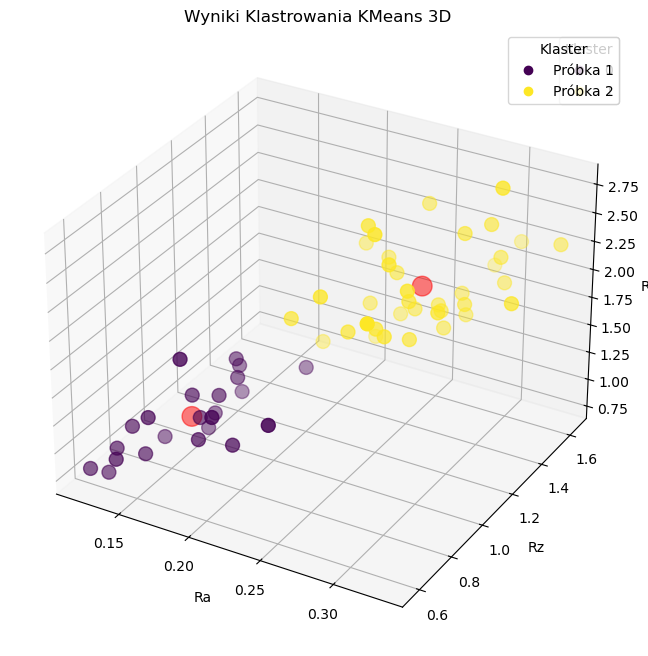

In [46]:
# Filtracja danych do klastrowania dla wybranych próbek i parametrów
data_for_clustering = sample_data[sample_data['Sample_Section'].isin(wybrane_probki)][['Sample_Section', 'Ra', 'Rz', 'Rt']]

# Liczba klastrów
n_clusters = 2

# Trenowanie modelu KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(data_for_clustering[['Ra', 'Rz', 'Rt']])


# Dodanie informacji o przynależności do klastra do danych
data_for_clustering['Cluster'] = clusters

# Przygotowanie danych do wizualizacji
plot_data = data_for_clustering.copy()

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapowanie numerów klastrów do etykiet próbek
cluster_to_label_mapping = {
    0: 'Próbka 1',
    1: 'Próbka 2',
    2: 'Próbka 3',
    3: 'Próbka 4'
}
plot_data['Cluster_Label'] = plot_data['Cluster'].map(cluster_to_label_mapping)

# Wizualizacja klastrów w 3D
scatter = ax.scatter(plot_data['Ra'], plot_data['Rz'], plot_data['Rt'], c=plot_data['Cluster'], cmap='viridis', s=100, label=plot_data['Cluster_Label'])

# Wizualizacja centrów klastrów
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.5)

# Legenda z etykietami próbek
legend1 = ax.legend(*scatter.legend_elements(), title="Klaster")
ax.add_artist(legend1)
# Dodajemy etykiety dla legendy klastrów
ax.legend(handles=scatter.legend_elements()[0], labels=list(cluster_to_label_mapping.values()), title="Klaster")

ax.set_title('Wyniki Klastrowania KMeans 3D')
ax.set_xlabel('Ra')
ax.set_ylabel('Rz')
ax.set_zlabel('Rt')
plt.show()

In [51]:
# Przygotowanie danych do wizualizacji (upewnij się, że 'Cluster' jest już dodany do data_for_clustering)
plot_data = data_for_clustering.copy()

color_map = {
    '208250_1': 'blue',
    '79028_1': 'green',
    '51824_2': 'red', 
    '88911_2': 'yellow',
}

# Utwórz mapowanie numerów klastrów do etykiet próbek, jeśli to konieczne
cluster_to_label_mapping = {
    0: 'Próbka 1',
    1: 'Próbka 2',
}
plot_data['Color'] = plot_data['Sample_Section'].map(color_map)

# Utwórz interaktywny wykres 3D
fig = px.scatter_3d(plot_data, x='Ra', y='Rz', z='Rt',
                    color='Color', 
                    labels={'Color': 'Klaster'},
                    title='Interaktywny Wykres Klastrowania KMeans 3D')
fig.update_traces(marker=dict(size=5))
fig.show()